In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_clean.csv")

In [3]:
# data cleaning and indexing 
df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01                          IDENTITY THEFT               N   
2003-01-01                          IDENTITY THEFT               N   
2003-01-01                          IDENTITY THEFT               N   
2003-01-01          AGG SEXUAL ASSAULT CHILD/OBJEC               N   
2003-01-01                          IDENTITY THEFT               N   

                       report_date_time                    location_type  \
occurred_date_time                                                         
2003-01-01          2012-01-23 09:41:00  SPECIALTY  STORE (TV  FUR ETC.)   
2003-01-01          2003-10-06 10:52:00                 RESIDENCE / HOME   
2003-01-01          2012-12-27 16:17:00                 RESIDENCE / HOME   
2003-01-01          2008-09-17 11:43:00                 RESIDENCE / HOME   
2003-01-01          2011-02-08 15:14:00                 RESIDENCE / HOME   

                                      address  zip_code  council_district  \
occurred_date_time                                                          
2003-01-01              1533 CUTTING HORSE LN   78727.0               7.0   
2003-01-01                 5708 WHITEBROOK DR   78724.0               1.0   
2003-01-01                    1738 RUTLAND DR   78758.0               4.0   
2003-01-01          2500 BLOCK S CONGRESS AVE   78704.0               3.0   
2003-01-01                       8220 W SH 71   78735.0               8.0   

                   apd_sector apd_district clearance_status  \
occurred_date_time                                            
2003-01-01                 ED            4                N   
2003-01-01                 CH            7              NaN   
2003-01-01                 ED            2                N   
2003-01-01                 DA            2                N   
2003-01-01                 DA            6                N   

                         clearance_date   latitude  longitude  year  month  \
occurred_date_time                                                           
2003-01-01          2012-01-23 00:00:00  30.416668 -97.683656  2003      1   
2003-01-01          2003-10-31 00:00:00  30.305744 -97.655117  2003      1   
2003-01-01          2012-12-28 00:00:00  30.376093 -97.710471  2003      1   
2003-01-01          2008-10-27 00:00:00        NaN        NaN  2003      1   
2003-01-01          2011-05-23 00:00:00  30.246747 -97.887325  2003      1   

                    week  day  hour  
occurred_date_time                   
2003-01-01             1    1     0  
2003-01-01             1    1     0  
2003-01-01             1    1     0  
2003-01-01             1    1     0  
2003-01-01             1    1     0

highest_offense_description family_violence  \
occurred_date_time                                                
2020-12-05 19:39:00       BURGLARY OF RESIDENCE               N   
2020-12-05 20:00:00        THEFT BY SHOPLIFTING               N   
2020-12-05 20:13:00         DISTURBANCE - OTHER               N   
2020-12-05 20:36:00       BURGLARY OF RESIDENCE               Y   
2020-12-05 20:47:00          DATING DISTURBANCE               N   

                        report_date_time      location_type  \
occurred_date_time                                            
2020-12-05 19:39:00  2020-12-05 21:28:00   RESIDENCE / HOME   
2020-12-05 20:00:00  2020-12-05 20:00:00  CONVENIENCE STORE   
2020-12-05 20:13:00  2020-12-05 20:13:00   RESIDENCE / HOME   
2020-12-05 20:36:00  2020-12-05 20:36:00   RESIDENCE / HOME   
2020-12-05 20:47:00  2020-12-05 20:47:00   RESIDENCE / HOME   

                                  address  zip_code  council_district  \
occurred_date_time                                                      
2020-12-05 19:39:00        3329 E 12TH ST   78721.0               1.0   
2020-12-05 20:00:00        1660 E 51ST ST   78723.0               4.0   
2020-12-05 20:13:00   2213 SINGLETREE AVE   78727.0               7.0   
2020-12-05 20:36:00  1800 S IH 35 SVRD SB   78704.0               9.0   
2020-12-05 20:47:00   9024 NORTHGATE BLVD   78758.0               4.0   

                    apd_sector apd_district clearance_status clearance_date  \
occurred_date_time                                                            
2020-12-05 19:39:00         CH            4              NaN            NaN   
2020-12-05 20:00:00         ID            5              NaN            NaN   
2020-12-05 20:13:00         AD            3              NaN            NaN   
2020-12-05 20:36:00         HE            1              NaN            NaN   
2020-12-05 20:47:00         ED            2              NaN            NaN   

                      latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                       
2020-12-05 19:39:00  30.276983 -97.698394  2020     12    49    5    19  
2020-12-05 20:00:00  30.304440 -97.698906  2020     12    49    5    20  
2020-12-05 20:13:00  30.421571 -97.696552  2020     12    49    5    20  
2020-12-05 20:36:00  30.240451 -97.738029  2020     12    49    5    20  
2020-12-05 20:47:00  30.370251 -97.717183  2020     12    49    5    20

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)

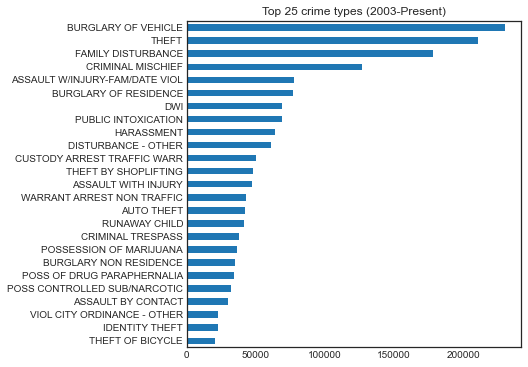

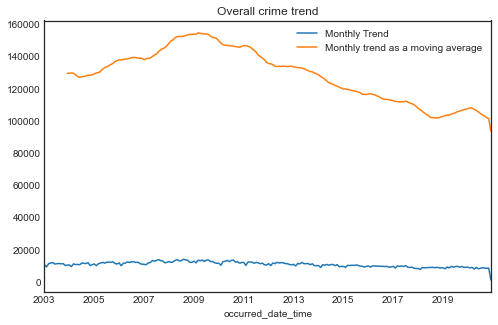

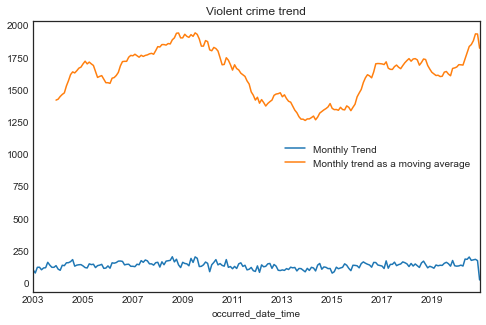

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

# Visualizing overall and violent crime trends
fig, ax = plt.subplots(figsize=(8, 5))
df.resample("M").size().plot()
df.resample("M").size().rolling(12).sum().plot(title="Overall crime trend")
ax.legend(["Monthly Trend", "Monthly trend as a moving average"])
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
df_viol.resample("M").size().plot()
df_viol.resample("M").size().rolling(12).sum().plot(title="Violent crime trend", ax=ax)
ax.legend(["Monthly Trend", "Monthly trend as a moving average"])
plt.show()

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


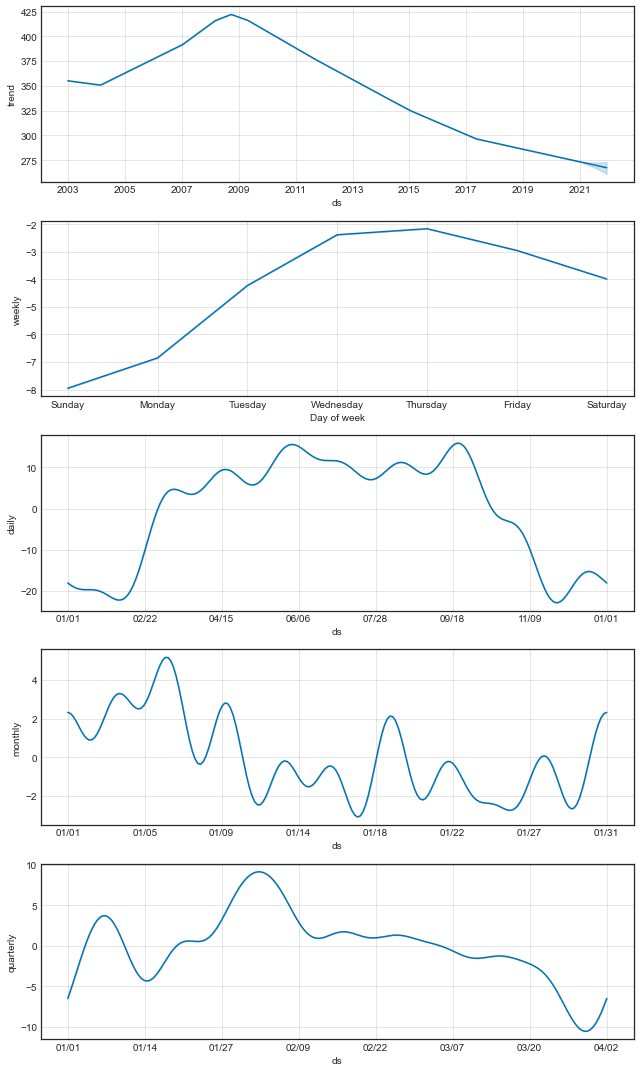

In [6]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


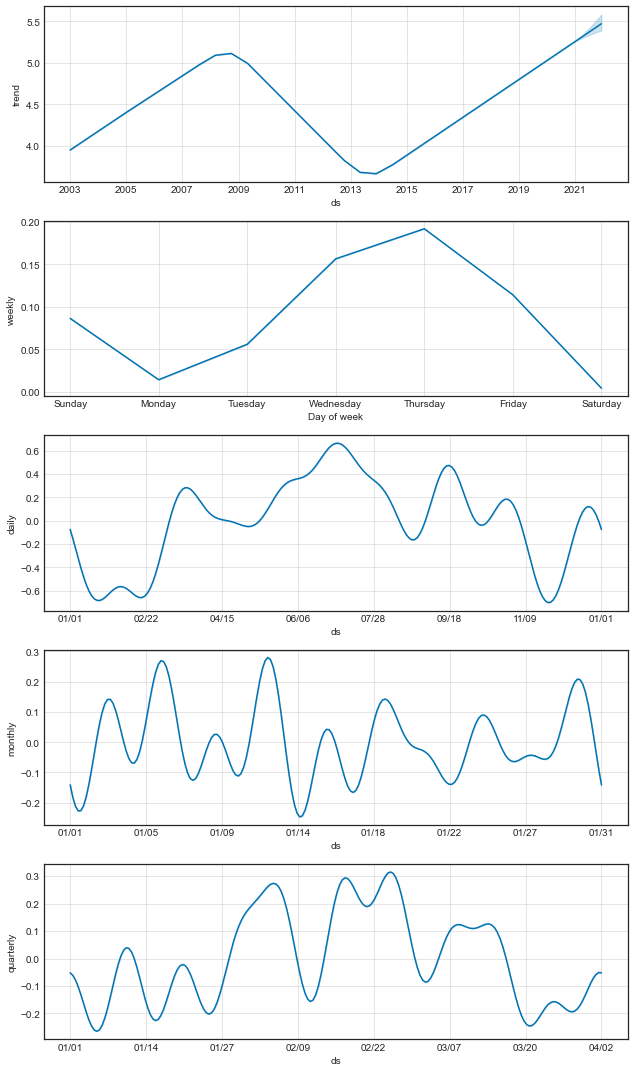

In [7]:
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
pred = n.predict(future)

fig3 = n.plot_components(pred)
fig3_1 = plot_plotly(n, pred)
fig3_1